<a href="https://colab.research.google.com/github/sAndreotti/MedicalMeadow/blob/main/ATML_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [23]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

## Investigate Dataset

In [15]:
ds = load_dataset("medalpaca/medical_meadow_medical_flashcards")
ds = ds['train']
ds

{'input': Value(dtype='string', id=None),
 'output': Value(dtype='string', id=None),
 'instruction': Value(dtype='string', id=None)}

In [17]:
print(ds.features)
print()

print("Instruction:")
print(f"length: {len(ds['instruction'])}")
print(f"example: {ds['instruction'][0]}")
print()

print(f"Input:")
print(f"length: {len(ds['input'])}")
print(f"example: {ds['input'][0]}")
print()

print(f"Output:")
print(f"length: {len(ds['output'])}")
print(f"example: {ds['output'][0]}")
print()

{'input': Value(dtype='string', id=None), 'output': Value(dtype='string', id=None), 'instruction': Value(dtype='string', id=None)}

Instruction:
length: 33955
example: Answer this question truthfully

Input:
length: 33955
example: What is the relationship between very low Mg2+ levels, PTH levels, and Ca2+ levels?

Output:
length: 33955
example: Very low Mg2+ levels correspond to low PTH levels which in turn results in low Ca2+ levels.



### Some plots about the dataset

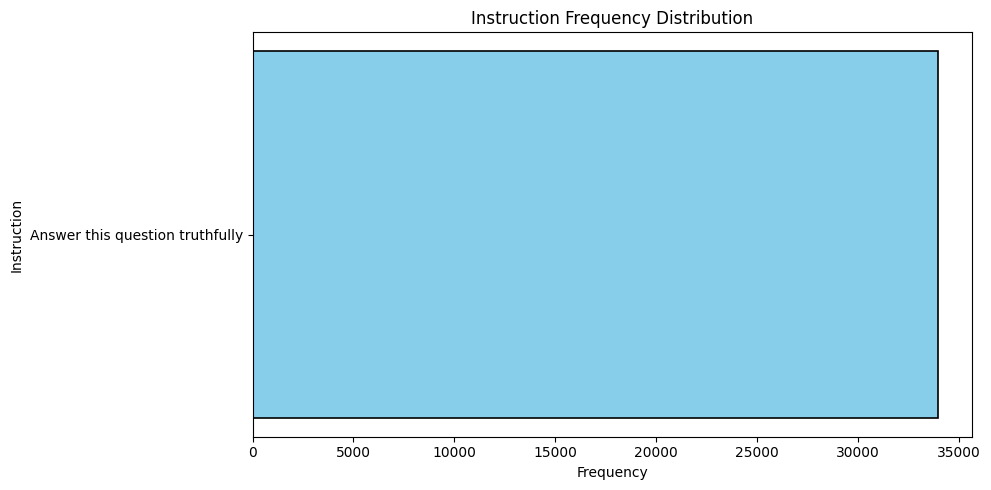

In [43]:
# Extract the 'instruction' field
instructions = ds['instruction']

# Count the frequency of each unique instruction
instruction_counts = {instruction: instructions.count(instruction) for instruction in set(instructions)}

# Sort the instructions by frequency
sorted_instructions = sorted(instruction_counts.items(), key=lambda x: x[1], reverse=True)

# Separate the instructions and their counts for plotting
sorted_instruction_names = [item[0] for item in sorted_instructions]
sorted_instruction_counts = [item[1] for item in sorted_instructions]

# Plotting the frequency of instructions
plt.figure(figsize=(10, 5))

bars = plt.barh(sorted_instruction_names, sorted_instruction_counts, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Instruction Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Instruction')

# Show the plot
plt.tight_layout()
plt.show()

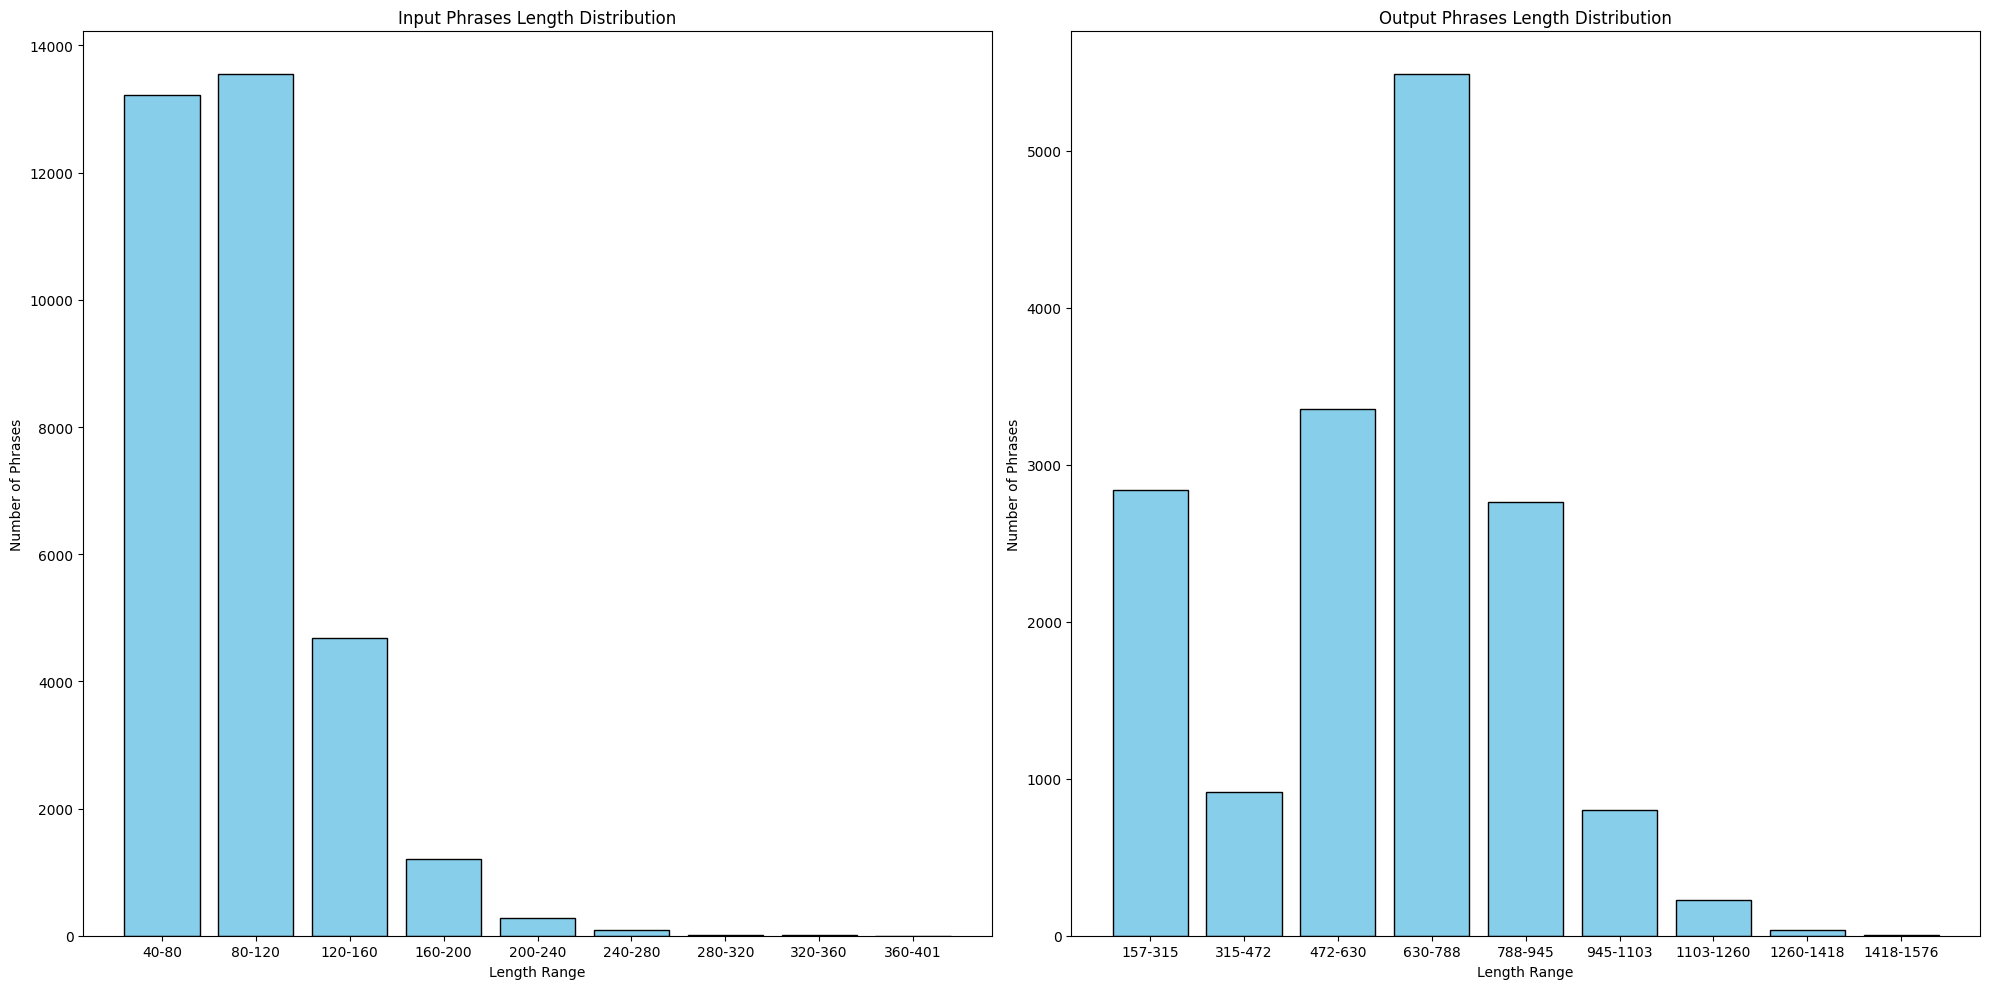

In [35]:
input_phrases = ds['input']
output_phrases = ds['output']

# Calculate the length of each phrase
input_lengths = [len(phrase) for phrase in input_phrases]
output_lengths = [len(phrase) for phrase in output_phrases]

# Define the bins for the length ranges
max_input = max(input_lengths)
max_output = max(output_lengths)

input_bins = [i * max_input / 10 for i in range(1, 11)]
output_bins = [i * max_output / 10 for i in range(1, 11)]
bin_labels_input = [f'{int(input_bins[i-1])}-{int(input_bins[i])}' for i in range(1, 10)]
bin_labels_output = [f'{int(output_bins[i-1])}-{int(output_bins[i])}' for i in range(1, 10)]

# Bin the lengths into the categories
input_binned = np.digitize(input_lengths, input_bins)  # Categorize based on input lengths
output_binned = np.digitize(output_lengths, output_bins)  # Categorize based on output lengths

# Count how many phrases fall into each bin
input_bin_counts = [sum(input_binned == i) for i in range(1, len(input_bins))]
output_bin_counts = [sum(output_binned == i) for i in range(1, len(output_bins))]

# Plotting the bar charts
plt.figure(figsize=(20, 10))

# Plotting the input phrase lengths
plt.subplot(1, 2, 1)
plt.bar(bin_labels_input, input_bin_counts, color='skyblue', edgecolor='black')
plt.title('Input Phrases Length Distribution')
plt.xlabel('Length Range')
plt.ylabel('Number of Phrases')

# Plotting the output phrase lengths
plt.subplot(1, 2, 2)
plt.bar(bin_labels_output, output_bin_counts, color='skyblue', edgecolor='black')
plt.title('Output Phrases Length Distribution')
plt.xlabel('Length Range')
plt.ylabel('Number of Phrases')

# Show the plots
plt.tight_layout()
plt.show()

## Train and evaluate models

## Add voice interactivity

## Potential extensions